---
title: "Deep Leaning"
author: "Hendrik > Calvin"
  
execute:
    echo: true
    cache: true
    freeze: true  # never re-render during project render
---

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Neural Networks Basics

- **Definition:** A neural network is a computational model inspired by the structure and functioning of the human brain. It consists of interconnected nodes (neurons) organized in layers.
  
- **Basic Architecture:**
  - Input Layer: Receives input data features.
  - Hidden Layers: Intermediate layers that perform computations.
  - Output Layer: Produces the final output or prediction.

- **Forward Pass and Activation Functions:**
  - Forward Pass: Input data flows through the network, and computations are performed layer by layer until the output is generated.
  - Activation Functions: Non-linear functions applied to the weighted sum of inputs to introduce non-linearity and enable the network to learn complex patterns.
  - Automatic feature engineering: we imagine that all the sophisticated feature engineering we are used to doing by hand happen automatically in the hidden layers.


<a title="Paskari at the English-language Wikipedia, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Feed_forward_neural_net.gif"><img width="512" alt="Feed forward neural net" src="https://upload.wikimedia.org/wikipedia/commons/5/54/Feed_forward_neural_net.gif?20240322215401"></a>

# Functional Form of a Neuron

- **Functional Form:**
  - Input: $ x = (x_1, x_2, ..., x_n) $ - Input features or values.
  - Weighted Sum: $ z = \sum_{i=1}^{n} w_i \cdot x_i + b $ - Linear combination of inputs with weights and bias.
  - Activation Function: $ a = f(z) $ - Non-linear function applied to the weighted sum.

<a title="Funcs, CC0, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Artificial_neuron_structure.svg"><img style="background-color:white" width="512" alt="Artificial neuron structure" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Artificial_neuron_structure.svg/512px-Artificial_neuron_structure.svg.png?20240531082700"></a>

# Activation Functions

- **Activation Functions:**
  - **Sigmoid Function:**
    - $ \sigma(z) = \frac{1}{1 + e^{-z}} $
    - S-shaped curve mapping input to a range between 0 and 1. Used in binary classification tasks.

  - **Softmax Function:**
    - $ \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}} $
    - Outputs a probability distribution over multiple classes. Used in multi-class classification tasks.

  - **ReLU (Rectified Linear Unit):**
    - $ \text{ReLU}(z) = \max(0, z) $
    - Outputs the input if it's positive, otherwise, outputs zero. Helps in overcoming the vanishing gradient problem.


  - **Other Activation Functions:**
    - **Tanh:** Hyperbolic tangent function, mapping input to a range between -1 and 1.
    - **Leaky ReLU:** Variation of ReLU that allows a small gradient for negative inputs, addressing the dying ReLU problem.
    - Many other activation functions exist, each with different properties and use cases.


# Functional Form of a Neuron

- **Functional Form:**
  - Input: $ x = (x_1, x_2, ..., x_n) $ - Input features or values.
  - Weighted Sum: $ z = \sum_{i=1}^{n} w_i \cdot x_i + b $ - Linear combination of inputs with weights and bias.
  - Activation Function: $ a = f(z) $ - Non-linear function applied to the weighted sum.

<a title="BrunelloN, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Example_of_a_deep_neural_network.png"><img width="512" alt="An example of the structure of a deep neural network." src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Example_of_a_deep_neural_network.png/512px-Example_of_a_deep_neural_network.png?20210813150620"></a>

## Why Python?

- [https://www.indeed.com/viewjob?jk=38667955752f8d57&from=shareddesktop_copy](https://www.indeed.com/viewjob?jk=38667955752f8d57&from=shareddesktop_copy)
- [https://www.indeed.com/viewjob?jk=d876a09728e8a21c&from=shareddesktop_copy](https://www.indeed.com/viewjob?jk=d876a09728e8a21c&from=shareddesktop_copy)
- [https://www.indeed.com/viewjob?jk=3eaf03f7179b791c&from=shareddesktop_copy](https://www.indeed.com/viewjob?jk=3eaf03f7179b791c&from=shareddesktop_copy)
- [https://www.indeed.com/viewjob?jk=8cc913a6e60fdb12&from=shareddesktop_copy](https://www.indeed.com/viewjob?jk=8cc913a6e60fdb12&from=shareddesktop_copy)
- [https://www.indeed.com/viewjob?jk=6be9e463d5db8fe0&from=shareddesktop_copy](https://www.indeed.com/viewjob?jk=6be9e463d5db8fe0&from=shareddesktop_copy)

In [10]:
# Here is an example neural network in PyTorch

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        print(out.shape)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [11]:
torch.cuda.is_available()

True

In [12]:
import rpy2
import rpy2.rinterface

In [13]:
%load_ext rpy2.ipython

c:\Users\cd-desk\AppData\Local\Programs\Python\Python312\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [14]:
%%R
library(torch)

# Define the neural network class
SimpleNN <- nn_module(
  initialize = function(input_size, hidden_size, output_size) {
    self$fc1 <- nn_linear(input_size, hidden_size)
    self$relu <- nn_relu()
    self$fc2 <- nn_linear(hidden_size, output_size)
    self$sigmoid <- nn_sigmoid()
  },
  
  forward = function(x) {
    out <- self$fc1(x)
    out <- self$relu(out)
    print(dim(out))
    out <- self$fc2(out)
    out <- self$sigmoid(out)
    out
  }
)

In addition: Warning messages:
1: package 'torch' was built under R version 4.4.3 
2: i torch failed to start, restart your R session to try again.
i You might need to reinstall torch using `install_torch()`
x C:\Users\cd-desk\AppData\Local\R\win-library\4.4\torch/lib\lantern.dll - The
  specified procedure could not be found.
Caused by error in `cpp_lantern_init()`:
 


# Motivation for Using Neural Networks

- **Universal Approximation Theorem (UAT):**
  - The UAT states that a feed-forward neural network with a single hidden layer and a non-linear activation function can approximate any continuous function to arbitrary accuracy given enough neurons in the hidden layer.
  - This theorem highlights the expressive power of neural networks in capturing complex relationships and functions.

- **Key Points:**
  - Neural networks with non-linear activation functions can learn and represent highly nonlinear and intricate mappings between inputs and outputs.
  - The flexibility and adaptability of neural networks make them suitable for a wide range of tasks, including regression and classification.
  - The number of neurons in the hidden layer and the choice of activation function play crucial roles in the network's capacity to approximate complex functions.



# Training Neural Networks

- **Training Process Overview:**
  - Initialize all parameter values to small random numbers.
  - Forward Pass:
    - Input data is passed through the network, and computations are performed layer by layer.
    - Activation functions introduce non-linearity into the model.
  
  - Loss Calculation:
    - The output of the network is compared to the target values using a loss function (more or less error).
    - Common loss functions include Mean Squared Error (MSE), Cross Entropy Loss, etc.
  
  - Backward Pass (Gradient Descent):
    - Gradients of the loss function with respect to the model parameters are computed using backpropagation.
    - Optimizers update the model parameters (weights and biases) to minimize the loss.

  - Update Weights and Biases:
    - Optimizers like SGD, Adam, RMSProp, etc., adjust the model parameters based on computed gradients and learning rate.


In [15]:
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

model = SimpleNN(input_size=4, hidden_size=10, output_size=3)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):

    # Iterate over the batches in the training DataLoader
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients from previous step

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()  # Compute gradients
        optimizer.step()  # Update model parameters

torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([32, 10])
torch.Size([24, 10])


In [16]:
with torch.no_grad():  # Disable gradient calculation
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)  # Get the class with the highest score

# Print the predictions
rand = np.random.choice(np.unique(y_test.numpy()), size=len(y_test), replace=True)
print("Predicted labels:", predicted.numpy())
print("Reference labels:", y_test.numpy())
print("~Random guessing:", rand)

torch.Size([30, 10])
Predicted labels: [1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 2 2]
Reference labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
~Random guessing: [0 1 0 2 0 2 0 2 2 2 0 1 0 2 1 1 0 0 0 2 2 2 1 0 0 1 0 2 1 1]


In [17]:
sum(predicted.numpy() == y_test.numpy()), sum(rand == y_test.numpy()), len(predicted) # Count correct predictions

(np.int64(9), np.int64(6), 30)

# Practical Applications of Neural Networks

- **Image Classification:**
  - Identifying objects, scenes, or patterns within images.
  - Applications in healthcare, autonomous vehicles, security, etc.

- **Natural Language Processing (NLP):**
  - Text analysis, sentiment analysis, language translation, chatbots, etc.
  - Used in social media, customer support, content generation, etc.

- **Medical Diagnosis:**
  - Disease diagnosis, medical imaging analysis, patient monitoring, drug discovery, etc.
  - Improving healthcare outcomes and decision-making.


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [19]:
# Input features (temperature in Celsius)
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
x = torch.tensor(t_c).view(-1, 1)  # Reshape to a 2D tensor with 11 rows and 1 column

# Target values (temperature in Fahrenheit)
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = torch.tensor(t_u).view(-1, 1)  # Reshape to a 2D tensor with 11 rows and 1 column

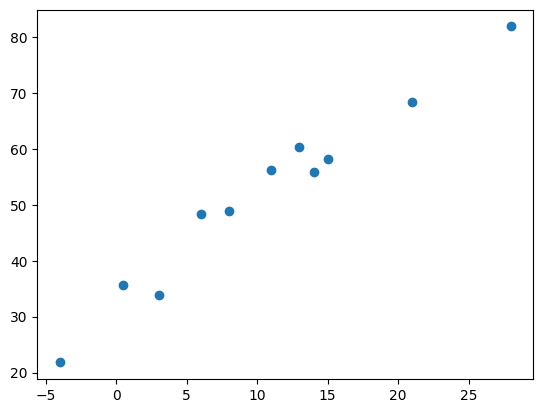

In [20]:
plt.scatter(t_c, t_u);

In [21]:
# Data normalization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_normalized = scaler_x.fit_transform(x.float())
y_normalized = scaler_y.fit_transform(y.float())

In [22]:
class LinearNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearNet, self).__init__()
        self.lin_coeffs = nn.Linear(input_size, output_size)


    def forward(self, x):
        x = self.lin_coeffs(x)
        return x


# Define a simple linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

In [23]:
# Instantiate the linear regression model, loss function, and optimizer
model = LinearNet(1,1)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [24]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(torch.tensor(x_normalized, dtype=torch.float32))

    # Compute and print loss
    loss = criterion(y_pred, torch.tensor(y_normalized, dtype=torch.float32))
    if epoch % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')
        print(model.state_dict())

    # Zero gradients, perform a backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training, print the final model parameters
print(f'Final Model Parameters: {model.state_dict()}')

Epoch 1, Loss: 2.106748580932617
OrderedDict({'lin_coeffs.weight': tensor([[-0.4010]]), 'lin_coeffs.bias': tensor([0.3991])})
Epoch 101, Loss: 1.4241530895233154
OrderedDict({'lin_coeffs.weight': tensor([[-0.1503]]), 'lin_coeffs.bias': tensor([0.3267])})
Epoch 201, Loss: 0.9667789936065674
OrderedDict({'lin_coeffs.weight': tensor([[0.0549]]), 'lin_coeffs.bias': tensor([0.2674])})
Epoch 301, Loss: 0.6603147387504578
OrderedDict({'lin_coeffs.weight': tensor([[0.2229]]), 'lin_coeffs.bias': tensor([0.2189])})
Epoch 401, Loss: 0.4549678564071655
OrderedDict({'lin_coeffs.weight': tensor([[0.3604]]), 'lin_coeffs.bias': tensor([0.1792])})
Epoch 501, Loss: 0.3173748254776001
OrderedDict({'lin_coeffs.weight': tensor([[0.4730]]), 'lin_coeffs.bias': tensor([0.1467])})
Epoch 601, Loss: 0.22518032789230347
OrderedDict({'lin_coeffs.weight': tensor([[0.5651]]), 'lin_coeffs.bias': tensor([0.1201])})
Epoch 701, Loss: 0.16340528428554535
OrderedDict({'lin_coeffs.weight': tensor([[0.6406]]), 'lin_coeffs.b

In [25]:
scaler_y.scale_

array([16.04861968])

In [26]:
8.78*0.9369

8.225981999999998

### Penguins



In [27]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [28]:
penguins = sns.load_dataset("penguins")

penguins = penguins.dropna()

In [29]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [30]:
penguins.shape

(333, 7)

In [31]:
label_encoder = LabelEncoder()
penguins['species_encoded'] = label_encoder.fit_transform(penguins['species'])

In [32]:
class PenguinDataset(Dataset):
    def __init__(self, data):
        self.X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
        self.y = data['species_encoded'].values # DONT FORGET .VALUES
        self.n_samples = len(data)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.int64)

    def __len__(self):
        return self.n_samples

In [33]:
train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=97301)

train_dataset = PenguinDataset(train_data)
test_dataset = PenguinDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [34]:
train_dataset.__getitem__(5)

(tensor([  36.7000,   19.3000,  193.0000, 3450.0000]), tensor(0))

In [35]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [36]:
input_size = 4  # Number of features
hidden_size = 64  # Size of the hidden layer
num_classes = len(label_encoder.classes_)
learning_rate = 0.001

In [37]:
num_classes

3

In [38]:
model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 256.6689
Epoch 2/10, Loss: 56.5208
Epoch 3/10, Loss: 20.3136
Epoch 4/10, Loss: 10.1350
Epoch 5/10, Loss: 9.8483
Epoch 6/10, Loss: 11.7395
Epoch 7/10, Loss: 6.6724
Epoch 8/10, Loss: 5.6617
Epoch 9/10, Loss: 6.3352
Epoch 10/10, Loss: 6.1882


In [40]:
# Evaluation on the test set
model.eval()
correct = 0
total = 0

# might be worth picking this apart line by line...
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Accuracy on test set: 43.28%


Well that was awful. Before we fix it...

In [41]:
num_batches_to_iterate = 3  # Specify the number of batches you want to iterate through

with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        if batch_idx >= num_batches_to_iterate:
            break
        outputs = model(inputs)
        print(inputs)
        print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        print('\n\n\n')

tensor([[  35.5000,   16.2000,  195.0000, 3350.0000],
        [  34.0000,   17.1000,  185.0000, 3400.0000],
        [  49.2000,   15.2000,  221.0000, 6300.0000]])
tensor([[ 636.6671,  634.6541,  637.5727],
        [ 645.9810,  643.4651,  645.5684],
        [1192.1962, 1182.4634, 1181.7388]])
tensor([2, 0, 0])




tensor([[  35.5000,   16.2000,  195.0000, 3350.0000],
        [  34.0000,   17.1000,  185.0000, 3400.0000],
        [  49.2000,   15.2000,  221.0000, 6300.0000]])
tensor([[ 636.6671,  634.6541,  637.5727],
        [ 645.9810,  643.4651,  645.5684],
        [1192.1962, 1182.4634, 1181.7388]])
tensor([2, 0, 0])




tensor([[  35.5000,   16.2000,  195.0000, 3350.0000],
        [  34.0000,   17.1000,  185.0000, 3400.0000],
        [  49.2000,   15.2000,  221.0000, 6300.0000]])
tensor([[ 636.6671,  634.6541,  637.5727],
        [ 645.9810,  643.4651,  645.5684],
        [1192.1962, 1182.4634, 1181.7388]])
tensor([2, 0, 0])






In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaled_features


In [43]:
train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=12345)

train_dataset = PenguinDataset(train_data)
test_dataset = PenguinDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)


model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [44]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 1.0034
Epoch 2/10, Loss: 0.7833
Epoch 3/10, Loss: 0.6128
Epoch 4/10, Loss: 0.4949
Epoch 5/10, Loss: 0.3995
Epoch 6/10, Loss: 0.3347
Epoch 7/10, Loss: 0.2778
Epoch 8/10, Loss: 0.2354
Epoch 9/10, Loss: 0.1982
Epoch 10/10, Loss: 0.1719


In [45]:
# Evaluation on the test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Accuracy on test set: 97.01%


How striking!

### Exercise: the titanic

In [46]:

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(url)

# Drop rows with missing values for simplicity
titanic_df = titanic_df.dropna()

In [47]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### Your exercise:

Create a neural network as above to model survival on the titanic dataset. There are several ways to do this. Here are some suggestions:
* change the size of the output layer (a simple probability, so 1)
* change the output of the final hidden layer to be a probability using nn.Sigmoid()
* change the loss criterion to be nn.BCELoss()

Please note that you can do this all differently: use 2 outputs (one per class), omit sigmoid and keep the same loss function, but the difference might be instructive.

* also: explore variations of the model architecture (multiple hidden layers? hidden layer size? etc.) and see how far you can push the model performance!

I encourage you to print out lots of intermediate things (your tensors? what is in your data loader? model parameters and performance? etc.)! I learned a lot doing it and I bet you will too.

#### One solution:

In [48]:
# Select relevant features and target
features = ['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
target = 'Survived'

# Standard scale the features
scaler = StandardScaler()
titanic_df[features] = scaler.fit_transform(titanic_df[features])

In [49]:
# Define a custom PyTorch dataset
class TitanicDataset(Dataset):
    def __init__(self, data):
        self.X = data[features].values
        self.y = data[target].values
        self.n_samples = len(data)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.n_samples

# Split data into train and test sets
train_data, test_data = train_test_split(titanic_df, test_size=0.2, random_state=42)

# Create PyTorch datasets and dataloaders
train_dataset = TitanicDataset(train_data)
test_dataset = TitanicDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [50]:
train_dataset.__getitem__(3)

(tensor([-0.3654, -0.1043, -0.4759, -0.4750, -0.3880]), tensor(1.))

In [51]:
# Define a simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out



In [52]:
# Initialize the model, loss function, and optimizer
input_size = len(features)  # Number of features
hidden_size = 64  # Size of the hidden layer
output_size = 1  # Output size (binary classification for survival)

model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [53]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        #print(targets)
        #print(outputs.squeeze())
        #print(outputs.shape)
        #print(outputs.squeeze().shape)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 0.6559
Epoch 2/10, Loss: 0.6542
Epoch 3/10, Loss: 0.6504
Epoch 4/10, Loss: 0.6496
Epoch 5/10, Loss: 0.6456
Epoch 6/10, Loss: 0.6431
Epoch 7/10, Loss: 0.6423
Epoch 8/10, Loss: 0.6421
Epoch 9/10, Loss: 0.6369
Epoch 10/10, Loss: 0.6389


In [54]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += targets.size(0)
        correct += (predicted == targets.unsqueeze(1)).sum().item()  # Ensure targets are 2D

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")


Accuracy on test set: 64.04%
